In [203]:
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd
import numpy as np 
from tslearn.metrics import dtw 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
from tslearn.clustering import TimeSeriesKMeans

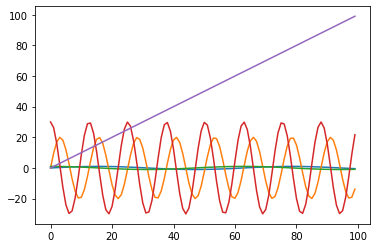

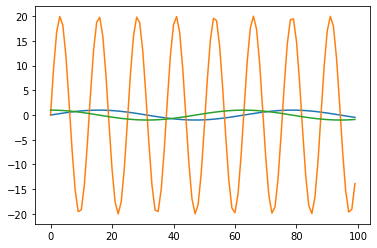

In [74]:
from numpy.random import randn
def sinx(a, dx, count, noise_factor):
    return a*np.sin(np.array([dx*i + randn()*noise_factor for i in range(count)]))

def cosx(a, dx, count, noise_factor):
    return a*np.cos(np.array([dx*i + randn()*noise_factor for i in range(count)]))

def line(a, x0, count, noise_factor):
    return np.array([a*i + randn()*noise_factor for i in range(count)])

def plot_datas(datas, colors=[]):
    count = len(datas[0])
    for i in range(len(datas)):
        if len(colors)!=0:
            plt.plot(np.arange(count), datas[i], c=colors[i])
        else:
            plt.plot(np.arange(count), datas[i])
    plt.show()
    
count = 100
noise_factor = 0.0
datas = [sinx(1, 0.1, count, noise_factor)
        , sinx(20, 0.5, count, noise_factor)
        , cosx(1, 0.1, count, noise_factor)
        , cosx(30, 0.5, count, noise_factor)
        , line(1, 1, count, noise_factor)]
df = pd.DataFrame(data = datas)
df2 = pd.DataFrame(data = datas[0:3])

datas = df.values
plot_datas(datas)
datas = df2.values
plot_datas(datas)


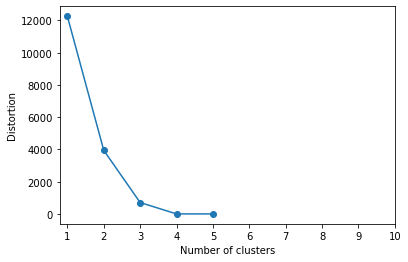

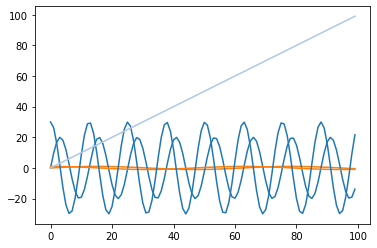

In [77]:
distortions = [] 

for i in range(1,11): 
    ts_km = TimeSeriesKMeans(n_clusters=i,metric="dtw",random_state=42) 
    ts_km.fit_predict(df)
    distortions.append(ts_km.inertia_) 

plt.plot(range(1,11),distortions,marker="o") 
plt.xticks(range(1,11)) 
plt.xlabel("Number of clusters") 
plt.ylabel("Distortion") 
plt.show()

ts_km = TimeSeriesKMeans(n_clusters=3,metric="dtw",random_state=42) 
y_pred = ts_km.fit_predict(df)
plot_datas(df.values, colors=[cm.tab20(y_pred[i]) for i in range(len(y_pred))])

In [127]:
import pickle as pkl
path = r"D:\atlas\u\lantaoyu\exps\airl\simple_tag\decentralized\s-1000\l-0.1-b-1000-d-0.1-c-500-l2-0.1-iter-1-r-0.0\seed-1\m_04000-100tra.pkl"
with open(path, "rb") as f:
    datas = pkl.load(f)

data = datas[0]
ob = data['ob']
ob = np.array([[str(x) for x in y] for y in ob])
ob = ob.T
df = pd.DataFrame(data = ob, index=["traj"+str(i) for i in range(ob.shape[0])], columns=['agent'+str(i) for i in range(ob.shape[1])])
df.head()

,agent0,agent1,agent2,agent3
traj0,[ 0. 0. -0.54780504 -0.998468...,[ 0. 0. 0.77719752 -0.635948...,[ 0. 0. -0.45289866 0.926643...,[ 0. 0. 0.55092992 -0.066128...
traj1,[ 3.00000000e-001 0.00000000e+000 -4.87805039...,[ 3.00000000e-001 -9.75519470e-215 8.37197518...,[ 9.11783111e-043 -3.00000000e-001 -4.52898655...,[ 2.82695323e-185 -4.00000000e-001 5.50929917...
traj2,[ 2.25000000e-001 -3.00000000e-001 -4.42805039...,[ 5.25000000e-001 -6.78169971e-195 9.42197518...,[ 8.71105862e-019 -5.25000000e-001 -4.52898655...,[ 2.12021492e-185 -7.00000000e-001 5.50929917...
traj3,[ 4.68750000e-001 -2.25000000e-001 -3.49055039...,[ 9.37500000e-002 -1.48816425e-176 9.60947518...,[ 3.27136337e-001 -2.65099927e-001 -3.87471388...,[-1.66448890e-176 -9.25000000e-001 5.50929917...
traj4,[ 6.51562500e-001 -1.68750000e-001 -2.18742539...,[-2.29687500e-001 -8.74321638e-141 9.15010018...,[ 5.92297530e-001 -2.85453168e-001 -2.69011882...,[-2.17503114e-140 -1.09375000e+000 5.50929917...


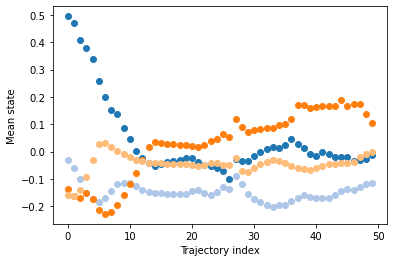

[ 0.          0.         -0.54780504 -0.99846863 -0.03921793  1.58436789
  0.70971515  1.47757651  1.32500256  0.36252054  0.09490638  1.92511234
  1.09873496  0.93233991  0.          0.        ]
[ 0.          0.          0.77719752 -0.63594808 -1.36422049  1.22184735
 -0.61528741  1.11505597 -1.32500256 -0.36252054 -1.23009617  1.5625918
 -0.2262676   0.56981937  0.          0.        ]


In [144]:
import pickle as pkl
path = r"D:\atlas\u\lantaoyu\exps\airl\simple_tag\decentralized\s-1000\l-0.1-b-1000-d-0.1-c-500-l2-0.1-iter-1-r-0.0\seed-1\m_04000-100tra.pkl"
with open(path, "rb") as f:
    datas = pkl.load(f)

data = datas[0]
ob = data['ob']
ob = np.array([[np.mean(x) for x in y] for y in ob])
data = ob
for i in range(len(data)):
    plt.scatter(np.arange(len(data[i])), data[i], color=cm.tab20(i))
plt.xlabel('Trajectory index')
plt.ylabel('Mean state')
plt.show()

data = datas[0]
ob = data['ob']
ob = np.array([[np.mean(x) for x in y] for y in ob])
ob = ob.T
df = pd.DataFrame(data = ob, index=["traj"+str(i) for i in range(ob.shape[0])], columns=['agent'+str(i) for i in range(ob.shape[1])])


## エージェントの位置の可視化
エージェントの位置で種類判定ができそうか➡無理，似たような位置の移動になっている

dict_keys(['ob', 'ac', 'rew', 'ep_ret', 'all_ob', 'pos'])


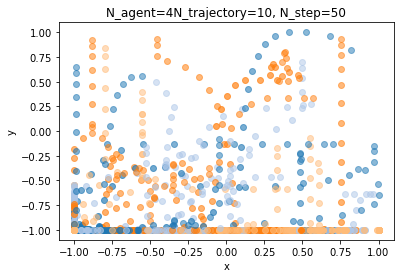

In [217]:
import pickle as pkl
path = r"D:\atlas\u\lantaoyu\exps\airl\simple_tag\decentralized\s-1000\l-0.1-b-1000-d-0.1-c-500-l2-0.1-iter-1-r-0.0\seed-1\m_04000-100tra.pkl"
with open(path, "rb") as f:
    datas = pkl.load(f)

print(datas[0].keys())

n_traj = 10
n_step = 50
n_agent = 4
for t in range(n_traj):
    pos = np.array(datas[t]['pos'])
    posx = np.array([[pos[i][j][0] for j in range(len(pos[i]))] for i in range(len(pos))])
    posy = np.array([[pos[i][j][1] for j in range(len(pos[i]))] for i in range(len(pos))])
    for i in range(n_agent):
        c = cm.tab20(i)[0:3]
        for j in range(n_step):
            plt.scatter(posx[i][j], posy[i][j], color=c+tuple([j/(2*n_step)+0.5]))
plt.title('N_agent='+str(n_agent)+ ', N_trajectory='+ str(n_traj) + ', N_step='+str(n_step))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [227]:
import pickle as pkl

colors = [(0, 0, 0.9), (0, 0, 0.7), (0, 0, 0.5), (0, 1.0, 0)]
def pos_plot(n_traj, agents, n_step):
    path = r"D:\atlas\u\lantaoyu\exps\airl\simple_tag\decentralized\s-1000\l-0.1-b-1000-d-0.1-c-500-l2-0.1-iter-1-r-0.0\seed-1\m_04000-100tra.pkl"
    with open(path, "rb") as f:
        datas = pkl.load(f)
    for t in range(n_traj):
        pos = np.array(datas[t]['pos'])
        posx = np.array([[pos[i][j][0] for j in range(len(pos[i]))] for i in range(len(pos))])
        posy = np.array([[pos[i][j][1] for j in range(len(pos[i]))] for i in range(len(pos))])
        for i in agents:
            #c = cm.tab20(i)[0:3]
            c = colors[i]
            for j in range(n_step):
                plt.scatter(posx[i][j], posy[i][j], color=c+tuple([j/(2*n_step)+0.5]))
    plt.title('agent='+str(agents)+ ', N_trajectory='+ str(n_traj) + ', N_step='+str(n_step))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

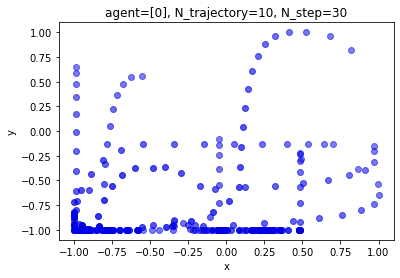

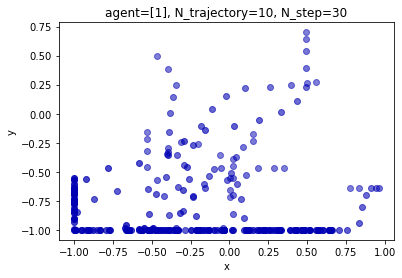

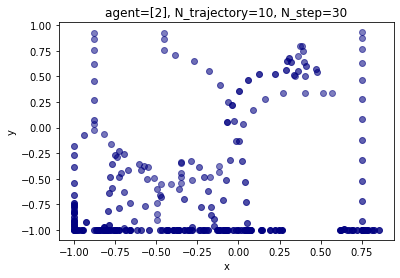

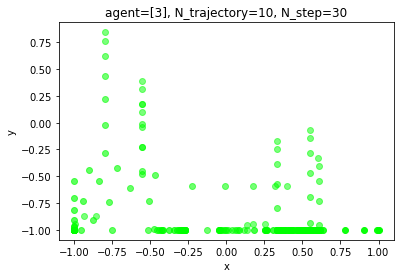

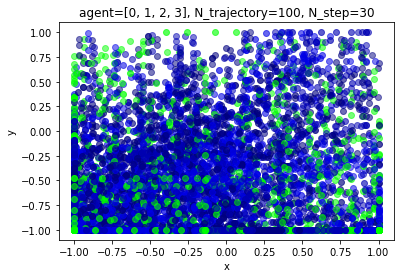

In [306]:
pos_plot(10, [0], 30)
pos_plot(10, [1], 30)
pos_plot(10, [2], 30)
pos_plot(10, [3], 30)
pos_plot(100, [0,1,2,3], 30)

In [254]:
def time_seties_kmean(df):
    for i in range(1,11): 
        ts_km = TimeSeriesKMeans(n_clusters=i,metric="dtw",random_state=42) 
        ts_km.fit_predict(df)
        distortions.append(ts_km.inertia_) 

    plt.plot(range(1,11),distortions,marker="o") 
    plt.xticks(range(1,11)) 
    plt.xlabel("Number of clusters") 
    plt.ylabel("Distortion") 
    plt.show()

### やっぱりposじゃ判定できない

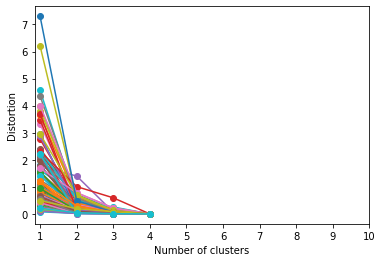

acc=0.1
[6, 18, 41, 49, 50, 58, 66, 67, 86, 95]


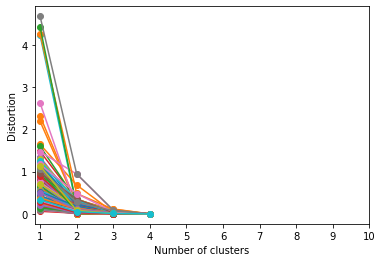

acc=0.11
[7, 8, 13, 14, 15, 17, 30, 40, 76, 80, 96]


In [274]:
path = r"D:\atlas\u\lantaoyu\exps\airl\simple_tag\decentralized\s-1000\l-0.1-b-1000-d-0.1-c-500-l2-0.1-iter-1-r-0.0\seed-1\m_04000-100tra.pkl"
with open(path, "rb") as f:
    datas = pkl.load(f)

n_traj = len(datas)
acc = 0
ts = []
for t in range(n_traj):
    data = np.array(datas[t]['pos'])
    posx = np.array([[data[i][j][0] for j in range(len(pos[i]))] for i in range(len(data))])
    posy = np.array([[data[i][j][1] for j in range(len(pos[i]))] for i in range(len(data))])

    df = pd.DataFrame(data = posx)
    distortions = [] 

    ts_km = TimeSeriesKMeans(n_clusters=2,metric="dtw",random_state=42) 
    y_pred = ts_km.fit_predict(df)
    #plot_datas(df.values, colors=[cm.tab20(y_pred[i]) for i in range(len(y_pred))])
    for i in range(1,11): 
        ts_km = TimeSeriesKMeans(n_clusters=i,metric="dtw",random_state=42) 
        ts_km.fit_predict(df)
        distortions.append(ts_km.inertia_) 
    if all(y_pred==[0,0,0,1]) or all(y_pred==[1,1,1,0]):
        acc += 1
        ts.append(t)
    plt.plot(range(1,11),distortions,marker="o") 
plt.xticks(range(1,11)) 
plt.xlabel("Number of clusters") 
plt.ylabel("Distortion") 
plt.show()
print("acc="+str(acc/n_traj))
print(ts)

n_traj = len(datas)
acc = 0
ts = []
for t in range(n_traj):
    data = np.array(datas[t]['pos'])
    posx = np.array([[data[i][j][0] for j in range(len(pos[i]))] for i in range(len(data))])
    posy = np.array([[data[i][j][1] for j in range(len(pos[i]))] for i in range(len(data))])

    df = pd.DataFrame(data = posy)
    distortions = [] 

    ts_km = TimeSeriesKMeans(n_clusters=2,metric="dtw",random_state=42) 
    y_pred = ts_km.fit_predict(df)
    #plot_datas(df.values, colors=[cm.tab20(y_pred[i]) for i in range(len(y_pred))])
    for i in range(1,11): 
        ts_km = TimeSeriesKMeans(n_clusters=i,metric="dtw",random_state=42) 
        ts_km.fit_predict(df)
        distortions.append(ts_km.inertia_) 
    if all(y_pred==[0,0,0,1]) or all(y_pred==[1,1,1,0]):
        acc += 1
        ts.append(t)
    plt.plot(range(1,11),distortions,marker="o") 
plt.xticks(range(1,11)) 
plt.xlabel("Number of clusters") 
plt.ylabel("Distortion") 
plt.show()
print("acc="+str(acc/n_traj))
print(ts)


## 行動の可視化
### 逃げる方は一直線で逃げるけど，追いかける方は先回りしようとして特徴が違いそう

In [303]:
path = r"D:\atlas\u\lantaoyu\exps\airl\simple_tag\decentralized\s-1000\l-0.1-b-1000-d-0.1-c-500-l2-0.1-iter-1-r-0.0\seed-1\m_04000-100tra.pkl"
with open(path, "rb") as f:
    datas = pkl.load(f)

colors = [(0, 0, 0.9), (0, 0, 0.7), (0, 0, 0.5), (0, 1.0, 0)]
def ac_plot(n_traj, agents, n_step):
    path = r"D:\atlas\u\lantaoyu\exps\airl\simple_tag\decentralized\s-1000\l-0.1-b-1000-d-0.1-c-500-l2-0.1-iter-1-r-0.0\seed-1\m_04000-100tra.pkl"
    with open(path, "rb") as f:
        datas = pkl.load(f)
    for t in range(n_traj):
        ac = np.array(datas[t]['ac'])
        ac = np.array([[ac[i][j].argmax() for j in range(len(ac[i]))] for i in range(len(ac))])
        for i in agents:
            #c = cm.tab20(i)[0:3]
            c = colors[i]
            plt.scatter(np.arange(n_step), ac[i][0:n_step], color=c+tuple([1.0]))
    plt.title('Action agent='+str(agents)+ ', N_trajectory='+ str(n_traj) + ', N_step='+str(n_step))
    plt.xlabel('step')
    plt.ylabel('action')
    plt.xlim(0, n_step)
    plt.ylim(0.0, 5.0)
    plt.show()

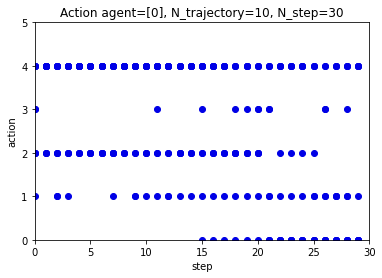

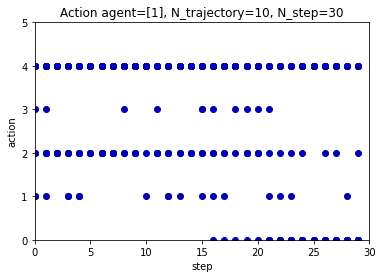

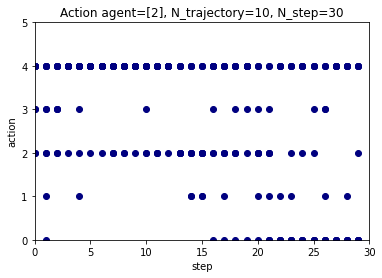

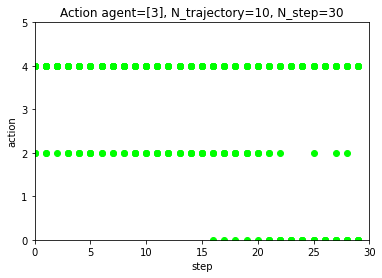

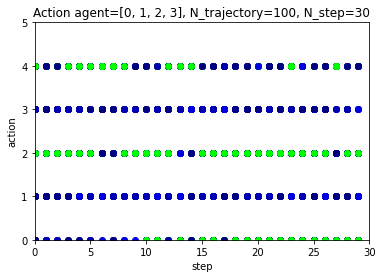

In [300]:
ac_plot(10, [0], 30)
ac_plot(10, [1], 30)
ac_plot(10, [2], 30)
ac_plot(10, [3], 30)
ac_plot(100, [0, 1, 2, 3], 30)

### 行動のTime Series K-means
意外と精度低い? acc=44%
各クラス分けの結果見たら圧倒的に正しかった
どうやって２と決める？

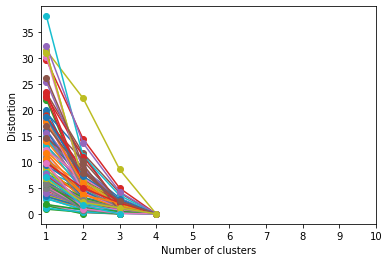

acc=0.44
[1, 4, 5, 7, 8, 14, 18, 20, 21, 23, 25, 28, 29, 30, 33, 34, 37, 39, 40, 47, 48, 49, 51, 60, 62, 63, 64, 65, 66, 67, 71, 73, 76, 77, 78, 79, 81, 84, 85, 86, 87, 91, 95, 96]
[ 0. 12.  6.  8.  0.  0.  0.  0. 44.  6.  9. 15.  0.  0.  0.]
44.0


In [318]:
path = r"D:\atlas\u\lantaoyu\exps\airl\simple_tag\decentralized\s-1000\l-0.1-b-1000-d-0.1-c-500-l2-0.1-iter-1-r-0.0\seed-1\m_04000-100tra.pkl"
with open(path, "rb") as f:
    datas = pkl.load(f)

def convert(x):
    return 1*x[0]+2*x[1]+(2**2)*x[2]+(2**3)*x[3]
n_traj = len(datas)
mat = np.zeros(convert([1,1,1,1]))
acc = 0
ts = []
for t in range(n_traj):
    ac = np.array(datas[t]['ac'])
    ac = np.array([[ac[i][j].argmax() for j in range(len(ac[i]))] for i in range(len(ac))])

    df = pd.DataFrame(data = ac)
    distortions = [] 

    ts_km = TimeSeriesKMeans(n_clusters=2,metric="dtw",random_state=42) 
    y_pred = ts_km.fit_predict(df)
    #plot_datas(df.values, colors=[cm.tab20(y_pred[i]) for i in range(len(y_pred))])
    for i in range(1,11): 
        ts_km = TimeSeriesKMeans(n_clusters=i,metric="dtw",random_state=42) 
        ts_km.fit_predict(df)
        distortions.append(ts_km.inertia_) 
    mat[convert(y_pred)] += 1
    if all(y_pred==[0,0,0,1]) or all(y_pred==[1,1,1,0]):
        acc += 1
        ts.append(t)
    plt.plot(range(1,11),distortions,marker="o") 
plt.xticks(range(1,11)) 
plt.xlabel("Number of clusters") 
plt.ylabel("Distortion") 
plt.show()
print("acc="+str(acc/n_traj))
print(ts)
print(mat)
print(mat[convert([0, 0, 0, 1])])

ちょっとだけ可視化してみる

(4, 50)


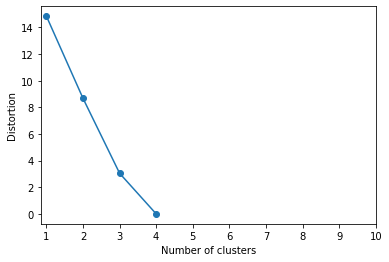

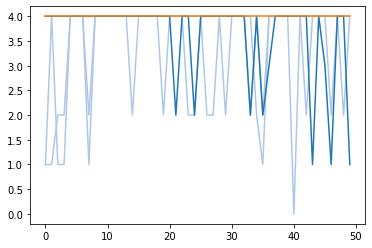

[1 1 0 2]


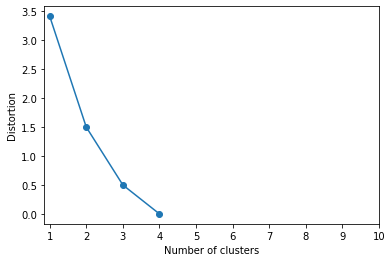

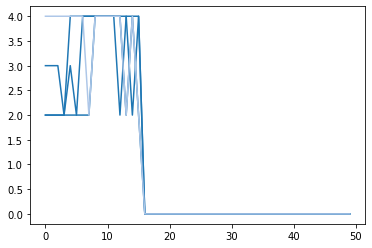

[0 0 0 1]


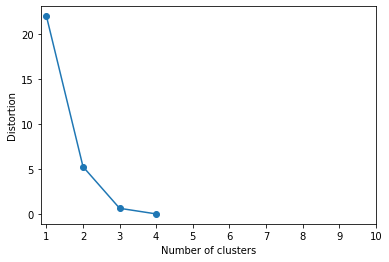

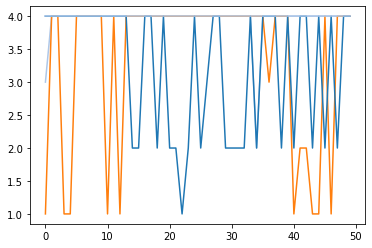

[1 2 0 1]


In [305]:
path = r"D:\atlas\u\lantaoyu\exps\airl\simple_tag\decentralized\s-1000\l-0.1-b-1000-d-0.1-c-500-l2-0.1-iter-1-r-0.0\seed-1\m_04000-100tra.pkl"
with open(path, "rb") as f:
    datas = pkl.load(f)
    
ac = np.array(datas[0]['ac'])

ac = np.array([[ac[i][j].argmax() for j in range(len(ac[i]))] for i in range(len(ac))])
print(ac.shape)

df = pd.DataFrame(data = ac)
distortions = [] 

time_seties_kmean(df)

ts_km = TimeSeriesKMeans(n_clusters=3,metric="dtw",random_state=42) 
y_pred = ts_km.fit_predict(df)
plot_datas(df.values, colors=[cm.tab20(y_pred[i]) for i in range(len(y_pred))])
print(y_pred)


ac = np.array(datas[1]['ac'])
ac = np.array([[ac[i][j].argmax() for j in range(len(ac[i]))] for i in range(len(ac))])

df = pd.DataFrame(data = ac)
distortions = [] 

time_seties_kmean(df)

ts_km = TimeSeriesKMeans(n_clusters=2, metric="dtw",random_state=42) 
y_pred = ts_km.fit_predict(df)
plot_datas(df.values, colors=[cm.tab20(y_pred[i]) for i in range(len(y_pred))])
print(y_pred)


ac = np.array(datas[2]['ac'])
ac = np.array([[ac[i][j].argmax() for j in range(len(ac[i]))] for i in range(len(ac))])

df = pd.DataFrame(data = ac)
distortions = [] 

time_seties_kmean(df)

ts_km = TimeSeriesKMeans(n_clusters=3,metric="dtw",random_state=42) 
y_pred = ts_km.fit_predict(df)
plot_datas(df.values, colors=[cm.tab20(y_pred[i]) for i in range(len(y_pred))])
print(y_pred)